In [7]:
library(reshape2)
library(RColorBrewer)
library(ggplot2)
setwd('/sc/arion/projects/roussp01a/liting/Olf/data/scenic_tf_auc')

# tf_auc <- list()
# for (repi in list.files(path = "/sc/arion/projects/roussp01a/liting/Olf/data/scenic_tf_auc", pattern = 'hvg_tf_aucsco*')){
#   tf_auc[[repi]]=melt(read.csv(repi))
# }

tf_auc <- list()
for (repi in list.files(path = "/sc/arion/projects/roussp01a/liting/Olf/data/scenic_tf_auc", pattern = '^tf_aucscore_re*')){
  tf_auc[[repi]]=melt(read.csv(repi))
}


dev_files <- list.files('/sc/arion/projects/roussp01a/liting/Olf/data/lister_devDEG/', '.txt')
dev_gs <- c()
for(fl in dev_files){
  dev_g <- read.table(paste0('/sc/arion/projects/roussp01a/liting/Olf/data/lister_devDEG/',fl),header = T)
  cell_type <- gsub('\\.txt|-','',fl)
  dev_g$celltype <- cell_type
  dev_gs <- rbind(dev_g,dev_gs)
}

#dev_gs <- subset(dev_gs, !grepl('^MT|^LINC|^MIR|^RP',gene_name ) & celltype=="L23_CUX2")
dev_gs <- subset(dev_gs, !grepl('^MT|^LINC|^MIR|^RP',gene_name ) )

down_brain <- subset(dev_gs, trend_class=='down')[,"gene_name"]



tf_aucs <- do.call('rbind',tf_auc)
xx=as.data.frame(sort(table(tf_aucs$variable))/4)

tf_aucs <- subset(tf_aucs, variable %in%subset(xx, Freq >= 40)[,'Var1'])
tf_aucs_mean <-  aggregate(value~N_types_stage+variable, tf_aucs, mean )
tf_aucs_mean$OSN <- ifelse(tf_aucs_mean$variable%in%down_brain,'devDEGs in EN','OSN-specific TFs')


Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

Using N_types_stage as id variables

U

pdf 
  2

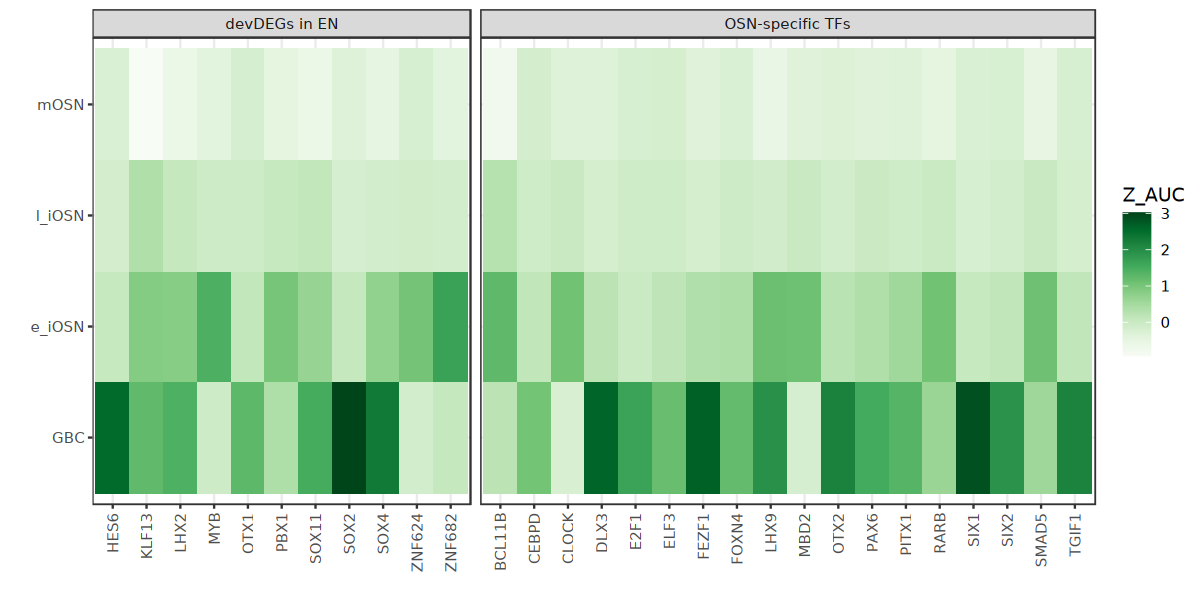

In [40]:
options(repr.plot.width=10, repr.plot.height=5)

yy = subset(tf_aucs_mean,  value> 1)[,'variable']

myPalette = colorRampPalette(brewer.pal(9, "Greens"), space="Lab")

tf_aucs_mean$variable <- as.character(tf_aucs_mean$variable)

sub_tf_aucs_mean <- subset(tf_aucs_mean,variable%in%yy)

ggplot(sub_tf_aucs_mean,aes(x=variable, y=factor(N_types_stage, levels = c('GBC','e_iOSN','l_iOSN','mOSN'))))+
  geom_tile(aes(fill = value))+
  scale_fill_gradientn(colours = myPalette(100),name = 'Z_AUC')+
 theme_bw()+
  facet_grid(.~OSN,scales = 'free',space = 'free')+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))+
  ylab('')+xlab('')
  
dev.print(pdf, file='/sc/arion/projects/roussp01a/liting/Olf/figures/tf.pdf',width=7,height=4)


In [68]:
# yy = subset(tf_aucs_mean,  value> 1)[,'variable']
# tf_aucs_mean$variable

In [50]:
tf_target_pair <- read.csv('/sc/arion/projects/CommonMind/roussp01a/ENT/snRNAseq/entnn_allG_tf_target.csv')
tf_target_pair[1:4,]
min(tf_target_pair$X1)
max(tf_target_pair$X1)

,X,X0,X1,tf,MotifID
,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,AHR,1.0000000,AHR,metacluster_19.9
2,1,RMDN2,2.6758838,AHR,metacluster_19.9
3,2,MAGI2,0.9908641,AHR,metacluster_19.9
4,3,RNF2,0.4153793,AHR,metacluster_19.9


[1] 5.588621e-17

[1] 10.27613

In [41]:
tf_target_pair <- unique(read.csv('/sc/arion/projects/CommonMind/roussp01a/ENT/snRNAseq/entnn_allG_tf_target.csv')[,c(2,4)])
load('/sc/arion/projects/roussp01a/liting/Olf/data/DEG_trend_Olf_k7_graph.RData')#DEG_trend_Olf

sub_tf <- unique(sub_tf_aucs_mean[,c('variable','OSN')])

sub_tf_target_pair <- merge(tf_target_pair, sub_tf, by.x="tf", by.y="variable")
colnames(sub_tf_target_pair)[2] <- 'Gene'
sub_tf_target_pair$trend_class <- DEG_trend_Olf[sub_tf_target_pair$Gene,'trend_class']
sub_tf_target_pair$g_cluster <- DEG_trend_Olf[sub_tf_target_pair$Gene,'g_cluster']

sub_tf_target_pair[1:3,]

,tf,Gene,OSN,trend_class,g_cluster
,<chr>,<chr>,<chr>,<chr>,<chr>
1,BCL11B,SLC24A3,OSN-specific TFs,NA,NA
2,BCL11B,RFX8,OSN-specific TFs,up,6
3,BCL11B,RAD23B,OSN-specific TFs,NA,NA


In [45]:
table(unique(sub_tf_target_pair[,c("Gene", "trend_class")])$trend_class)


    down trans_up       up 
     624      265      260 

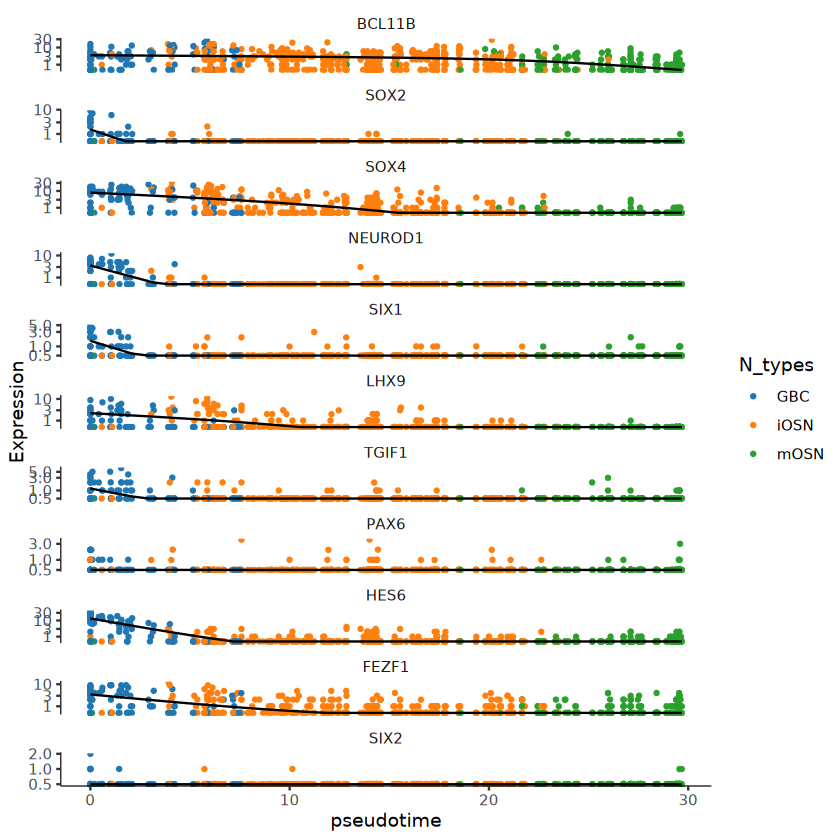

In [51]:
#myPalette2way=colorRampPalette(rev(c("#67001F","#B2182B","#D6604D","#F4A582","#FDDBC7","#F7F7F7","#D1E5F0","#92C5DE","#4393C3","#2166AC","#053061")), space="Lab")


monocle3::plot_genes_in_pseudotime(int_N[c('BCL11B','SOX2','SOX4','NEUROD1','SIX1','LHX9','TGIF1','PAX6','HES6','FEZF1','SIX2'),] ,
                                   label_by_short_name=F,
                                   color_cells_by='N_types',
                                   min_expr=0.5)+
  scale_color_manual(values =  c('#1f77b4','#ff7f0e','#2ca02c'),breaks = c('GBC','iOSN','mOSN'))

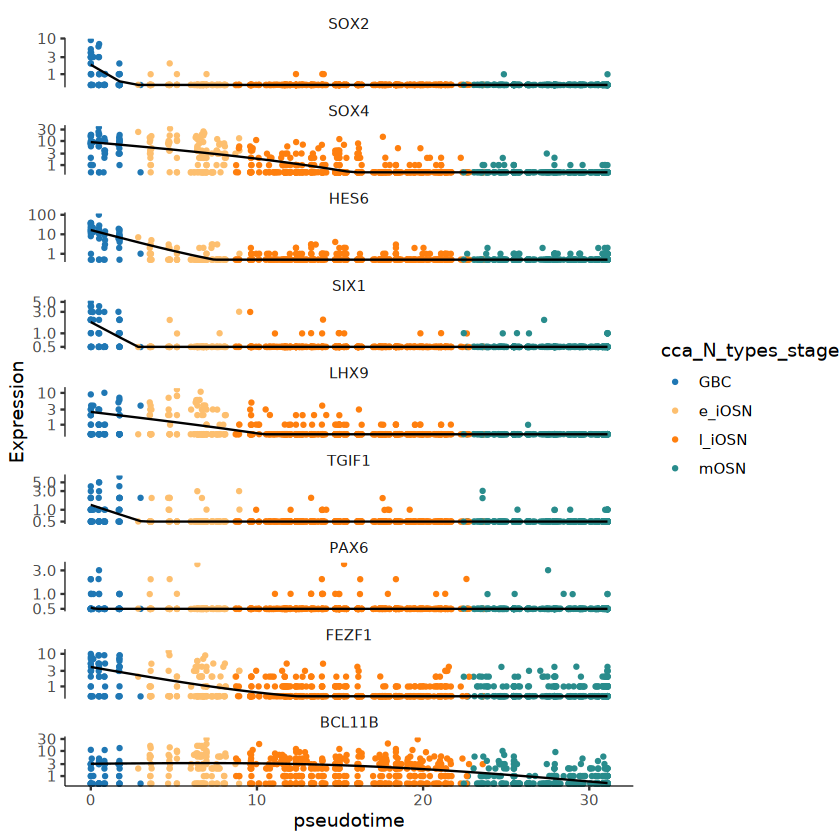

In [79]:
#NEUROD1
load('/sc/arion/projects/roussp01a/liting/Olf/figures/mnc3_ent_nn.RData')
monocle3::plot_genes_in_pseudotime(int_N[c('SOX2','SOX4','HES6','SIX1','LHX9','TGIF1','PAX6','FEZF1','BCL11B'),] ,
                                   label_by_short_name=F,
                                   color_cells_by='cca_N_types_stage',
                                   min_expr=0.5)+
scale_color_manual(values =  c('#1f77b4','#FDBF6F','#ff7f0e',"#298c8c"),breaks = c('GBC','e_iOSN','l_iOSN','mOSN'))